Assignment 4 - utilizing newsdata.io API for data analysis 🐍

In [1]:
from newsdataapi import NewsDataApiClient
import matplotlib.pyplot as plt
from config import API_KEY
from wordcloud import WordCloud
from collections import Counter
from textblob import TextBlob

In [2]:
# API key authorization, Initialize the client with your API key
api = NewsDataApiClient(apikey=API_KEY)

Creating the variables for three different article subjects

In [3]:
# News API
# Searching for news articles consisting keyword: ransomware
responseRWTitle = api.news_api(qInTitle="ransomware", country="us, ru")

# Searching for news about keyword: vulnerabilities
responseVul = api.news_api(q="vulnerability", category="technology", language="en")

# Searching for news about keyword: malware
responseMal = api.news_api(q="malware", language="en")

# Also a variable to exclude common words in the word count
common_words_to_exclude = ['the', 'to', 'of', 'in', 'is', 'and', 'a', 'as', 'that', 'for']

Ransomware:

In [4]:
all_keywords_rw = [keyword for article in responseRWTitle['results'] if article['keywords'] for keyword in article['keywords']]
keyword_counts_rw = Counter(all_keywords_rw)

# Print the most common keywords
print("Most common keywords:")
print(keyword_counts_rw.most_common(10))


Most common keywords:
[('Check Point Research Publications', 1), ('Ransomware', 1), ('Tech', 1)]


Utilizing WordCloud to analyze keyword frequencies:

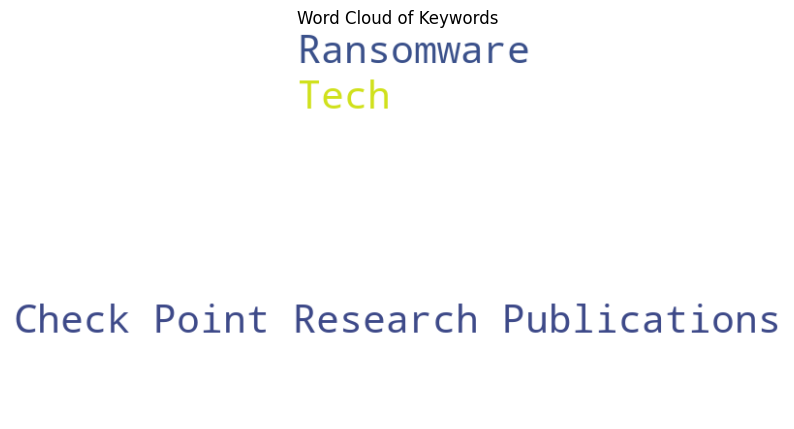

In [5]:
# Generate a word cloud for visualization
wordcloud_rw = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(keyword_counts_rw)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_rw, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Keywords')
plt.show()

Analyzing the 'content' with word count.

Top 10 Words (excluding common words):
[('Marc', 1), ('Salinas', 1), ('Fernandez', 1), ('Key', 1), ('Points', 1), ('Introduction', 1), ('During', 2), ('last', 4), ('few', 3), ('months,', 1)]


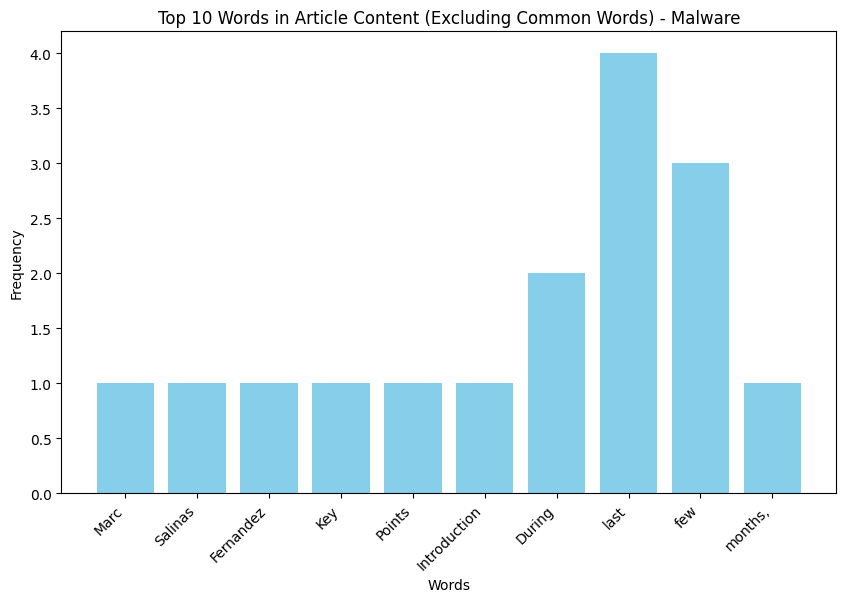

In [6]:
# join all the article 'content' together
all_content_rw = ' '.join([article['content'] for article in responseRWTitle['results'] if article['content']])

# Utilizing split()
words_rw = all_content_rw.split()

# Calculate word frequencies
word_counts_rw = Counter(words_rw)

# Filter out common words from word_counts_rw
filtered_word_counts_rw = [(word, count) for word, count in word_counts_rw.items() if word.lower() not in common_words_to_exclude]

# Print the most common words after filtering
print("Top 10 Words (excluding common words):")
print(filtered_word_counts_rw[:10])

# Plotting a bar chart for the top words
plt.figure(figsize=(10, 6))
top_words, word_counts = zip(*filtered_word_counts_rw[:10])
plt.bar(top_words, word_counts, color='skyblue')
plt.title('Top 10 Words in Article Content (Excluding Common Words) - Malware')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


Sentiment Analysis:

Sentiment Score of Ransomware Article Content: 0.09000607466313237


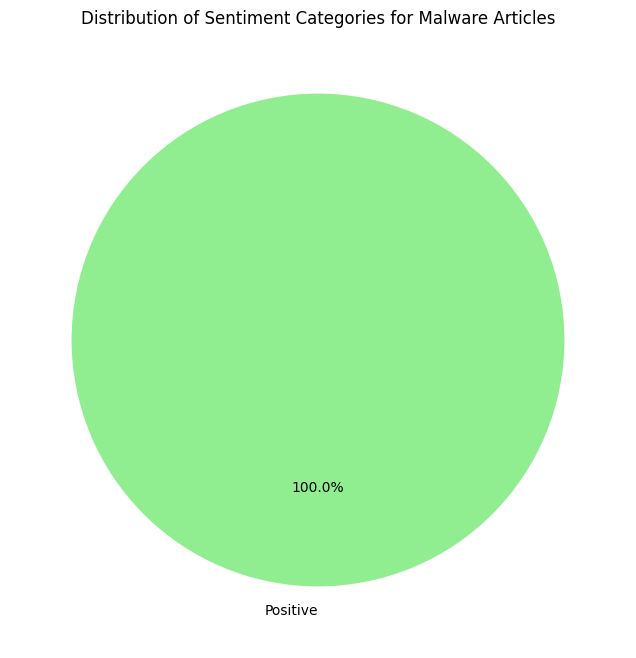

In [24]:
# Analyze the overall sentiment
content_blob_rw = TextBlob(all_content_rw)
sentiment_score_rw = content_blob_rw.sentiment.polarity

# Print the sentiment score
print("Sentiment Score of Ransomware Article Content:", sentiment_score_rw)

# Categorize sentiment scores
if sentiment_score_rw > 0:
    sentiment_category = 'Positive'
elif sentiment_score_rw == 0:
    sentiment_category = 'Neutral'
else:
    sentiment_category = 'Negative'

# Pie chart
labels = [sentiment_category]
sizes = [1]
colors = ['lightgreen' if sentiment_score_rw > 0 else 'lightgray' if sentiment_score_rw == 0 else 'lightcoral']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sentiment Categories for Malware Articles')
plt.show()

Vulnerability articles:

In [8]:
all_keywords_vul = [keyword for article in responseVul['results'] if article['keywords'] for keyword in article['keywords']]
keyword_counts_vul = Counter(all_keywords_vul)

# Print the most common keywords
print("Most common keywords:")
print(keyword_counts_vul.most_common(10))


Most common keywords:
[('Cloud Security', 3), ('Technology', 2), ('IT, New Media & Software', 1), ('Entertainment', 1), ('Guides', 1), ('best movies on Netflix', 1), ('best Thanksgiving movies', 1), ('Thanksgiving 2023', 1), ('Computing', 1), ('News', 1)]


Utilizing WordCloud to analyze keyword frequencies:

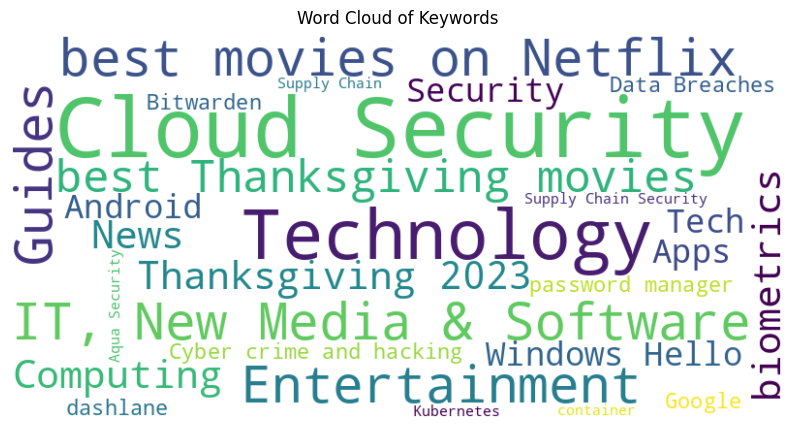

In [9]:
# Generate a word cloud for visualization
wordcloud_vul = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(keyword_counts_vul)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_vul, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Keywords')
plt.show()

Analyzing the 'content' with word count.

Top 10 Words (excluding common words):
[('Automotive', 6), ('Cyber', 11), ('Security', 19), ('Market', 13), ('Size,', 5), ('Share,', 5), ('Trends,', 5), ('Analysis,', 5), ('Global', 3), ('Report', 7)]


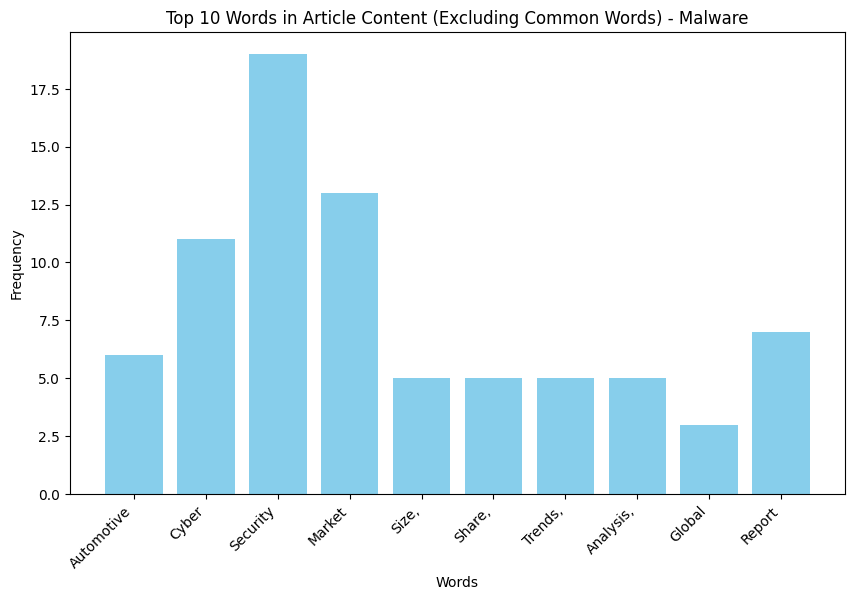

In [10]:
# join all the article 'content' together
all_content_vul = ' '.join([article['content'] for article in responseVul['results'] if article['content']])

# Utilizing split()
words_vul = all_content_vul.split()

# Calculate word frequencies
word_counts_vul = Counter(words_vul)

# Filter out common words from word_counts_rw
filtered_word_counts_vul = [(word, count) for word, count in word_counts_vul.items() if word.lower() not in common_words_to_exclude]

# Print the most common words after filtering
print("Top 10 Words (excluding common words):")
print(filtered_word_counts_vul[:10])

# Plotting a bar chart for the top words
plt.figure(figsize=(10, 6))
top_words, word_counts = zip(*filtered_word_counts_vul[:10])
plt.bar(top_words, word_counts, color='skyblue')
plt.title('Top 10 Words in Article Content (Excluding Common Words) - Malware')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

Sentiment Analysis:

Sentiment Score of Vulnerability Article Content: 0.14479559149698057


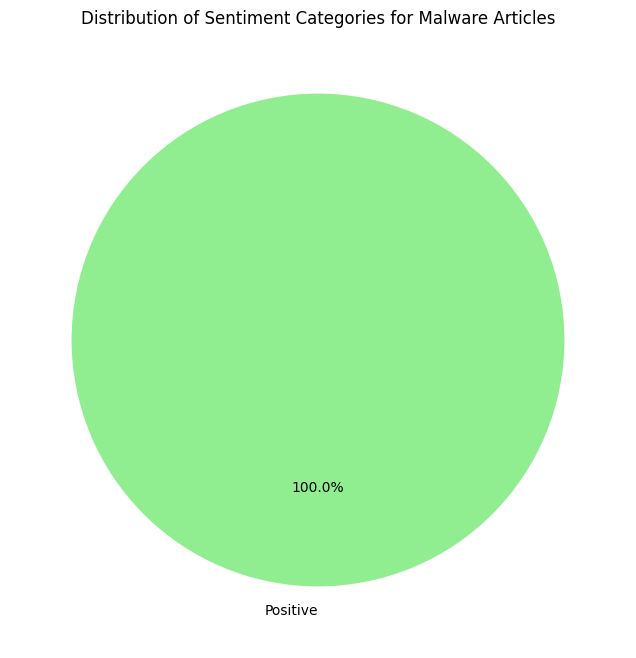

In [23]:
# Analyze the overall sentiment
content_blob_vul = TextBlob(all_content_vul)
sentiment_score_vul = content_blob_vul.sentiment.polarity

# Print the sentiment score
print("Sentiment Score of Vulnerability Article Content:", sentiment_score_vul)

# Categorize sentiment scores
if sentiment_score_vul > 0:
    sentiment_category = 'Positive'
elif sentiment_score_vul == 0:
    sentiment_category = 'Neutral'
else:
    sentiment_category = 'Negative'

# Pie chart
labels = [sentiment_category]
sizes = [1]
colors = ['lightgreen' if sentiment_score_vul > 0 else 'lightgray' if sentiment_score_vul == 0 else 'lightcoral']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sentiment Categories for Malware Articles')
plt.show()

Malware articles:

In [12]:
all_keywords_mal = [keyword for article in responseMal['results'] if article['keywords'] for keyword in article['keywords']]
keyword_counts_mal = Counter(all_keywords_mal)

# Print the most common keywords
print("Most common keywords:")
print(keyword_counts_mal.most_common(10))

Most common keywords:
[('Security', 3), ('Cloud', 2), ('cybersecurity', 2), ('malware', 2), ('Online & Social', 1), ('Opinion', 1), ('People', 1), ('free cybersecurity awareness', 1), ('importance of secure online payments', 1), ('internet', 1)]


Utilizing WordCloud to analyze keyword frequencies:

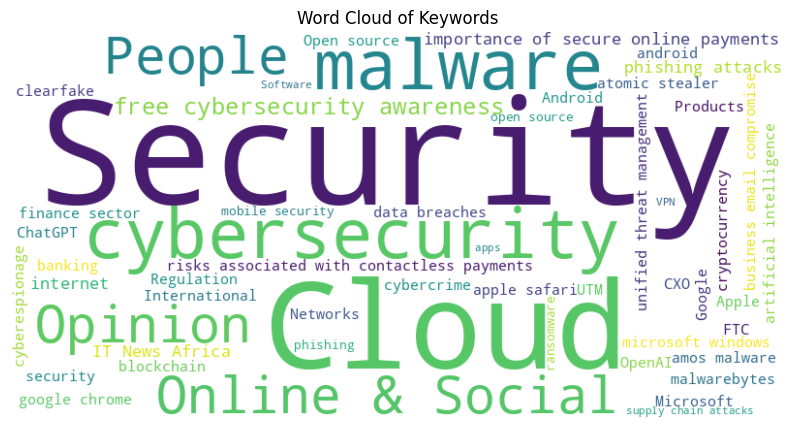

In [13]:
# Generate a word cloud for visualization
wordcloud_mal = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(keyword_counts_mal)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_mal, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Keywords')
plt.show()

Analyzing the 'content' with word count.

Top 10 Words (excluding common words):
[('Black', 4), ('Friday', 3), ('sales', 7), ('have', 52), ('become', 4), ('extremely', 2), ('popular', 2), ('South', 2), ('Africa,', 1), ('so', 15)]


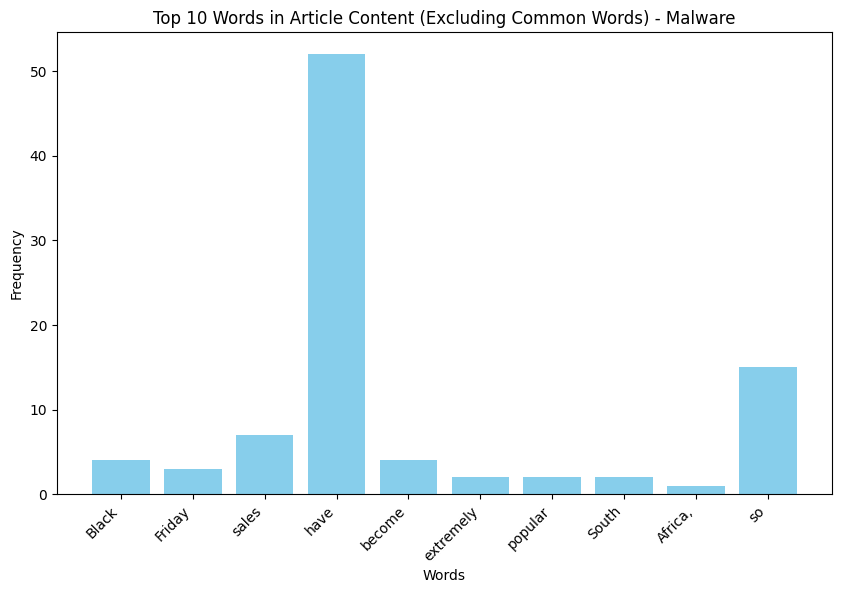

In [14]:
# join all the article 'content' together
all_content_mal = ' '.join([article['content'] for article in responseMal['results'] if article['content']])

# Utilizing split()
words_mal = all_content_mal.split()

# Calculate word frequencies
word_counts_mal = Counter(words_mal)

# Filter out common words from word_counts_rw
filtered_word_counts_mal = [(word, count) for word, count in word_counts_mal.items() if word.lower() not in common_words_to_exclude]

# Print the most common words after filtering
print("Top 10 Words (excluding common words):")
print(filtered_word_counts_mal[:10])

# Plotting a bar chart for the top words
plt.figure(figsize=(10, 6))
top_words, word_counts = zip(*filtered_word_counts_mal[:10])
plt.bar(top_words, word_counts, color='skyblue')
plt.title('Top 10 Words in Article Content (Excluding Common Words) - Malware')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right') 
plt.show()

Sentiment Analysis:

Sentiment Score of Malware Article Content: 0.1516294715071406


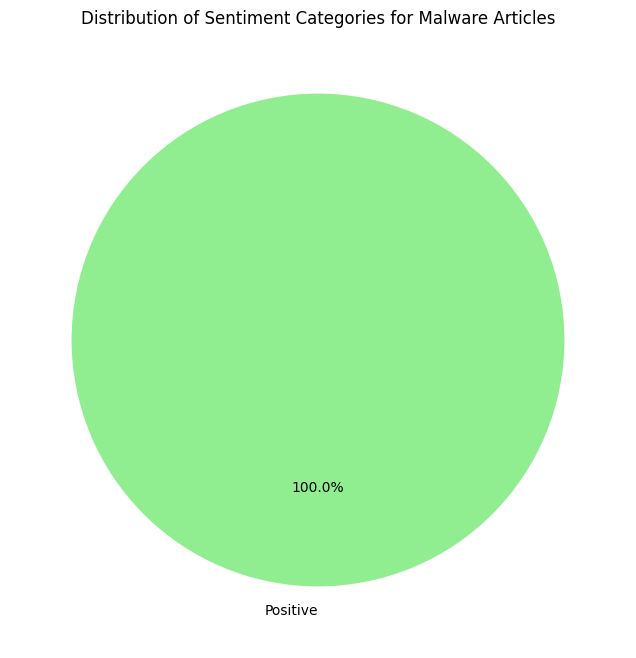

In [20]:
# Analyze the overall sentiment
content_blob_mal = TextBlob(all_content_mal)
sentiment_score_mal = content_blob_mal.sentiment.polarity

# Print the sentiment score
print("Sentiment Score of Malware Article Content:", sentiment_score_mal)

# Categorize sentiment scores
if sentiment_score_mal > 0:
    sentiment_category = 'Positive'
elif sentiment_score_mal == 0:
    sentiment_category = 'Neutral'
else:
    sentiment_category = 'Negative'

# Pie chart
labels = [sentiment_category]
sizes = [1]
colors = ['lightgreen' if sentiment_score_mal > 0 else 'lightgray' if sentiment_score_mal == 0 else 'lightcoral']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sentiment Categories for Malware Articles')
plt.show()
